<h1>Reconnaissance de Chiffres Manuscrits avec un Réseau Neuronal Convolutif (CNN)</h1>

<h3>1. Chargement et Prétraitement des Données</h3>
<p>Chargement des données MNIST et les redimensionnons pour qu'elles soient compatibles avec les couches de convolution. Les données sont normalisées pour avoir des valeurs entre 0 et 1.</p>

<h3>2. Construction du Modèle CNN</h3>
<p>Le modèle est construit avec deux couches de convolution suivies de couches de max-pooling pour extraire les caractéristiques importantes des images. Ensuite, les caractéristiques extraites sont passées à travers des couches entièrement connectées pour la classification finale.</p>

<h3>3. Compilation et Entraînement du Modèle</h3>
<p>Le modèle est compilé avec l'optimiseur Adam et la fonction de perte 'categorical_crossentropy'. Il est ensuite entraîné pendant 10 epochs sur les données d'entraînement.</p>

<h3>4. Prédictions et Sauvegarde dans un Fichier CSV</h3>
<p>Le modèle fait des prédictions sur les données de test, et les étiquettes prédites sont sauvegardées dans un fichier CSV .</p>

<h3>5. Affichage des Résultats</h3>
<p>Une image de l'ensemble de données d'entraînement est affichée avec son étiquette réelle et la prédiction faite par le modèle.</p>


# Import des bibliothèques nécessaires

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Chargement des données

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("The MNIST database has a training set of %d examples."%len(X_train))
print("The MNIST database has a test set of %d examples."%len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


# Preprocessing the data

Préparation des données à alimenter le modèle CNN où chaque image est représentée sous la forme d’une matrice 28x28.

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


In [7]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualize the First Six Training Images

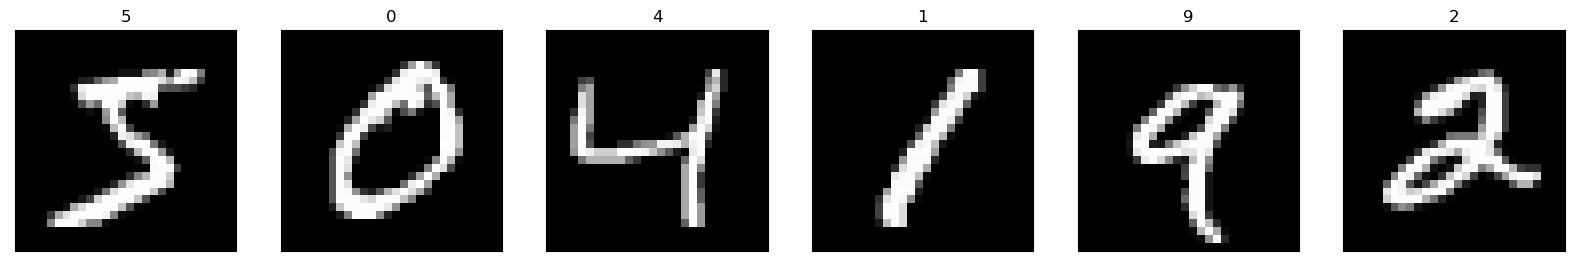

In [8]:
# Plot first six training images
fig = plt.figure(figsize=(20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(str(np.argmax(y_train[i])))
plt.show()

# Construction du modèle CNN

In [9]:
# Define input layer
input_layer = Input(shape=(28, 28, 1))

# Define model layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

In [10]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer (InputLayer)   │ (None, 28, 28, 1)   │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ conv2d (Conv2D)            │ (None, 26, 26, 32)  │         320 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling2d              │ (None, 13, 13, 32)  │           0 │
│ (MaxPooling2D)             │                     │             │
├────────────────────────────┼─────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)          │ (None, 11, 11, 64)  │      18,496 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling2d_1            │ (None, 5, 5, 64)    │           0 │
│ (MaxPooling2D)             │                     │             │
├────────────────────────────┼─────────────────────┼─────────────┤
│ flatten (Flatten)          │ (None, 1600)        │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense (Dense)              │ (None, 128)         │     204,928 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_1 (Dense)            │ (None, 10)          │       1,290 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compilation du modèle

Utilisation de 'categorical_crossentropy' pour les labels one-hot encodés

In [11]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9104 - loss: 0.2950 - val_accuracy: 0.9854 - val_loss: 0.0436
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9862 - loss: 0.0433 - val_accuracy: 0.9906 - val_loss: 0.0288
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9893 - val_loss: 0.0317
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9901 - val_loss: 0.0305
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9952 - loss: 0.0136 - val_accuracy: 0.9903 - val_loss: 0.0310
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9969 - loss: 0.0106 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9977 - loss: 0.0080 - val_accuracy: 0.9899 - val_loss: 0.0338
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9978 -

In [13]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.989


# Prédictions

In [14]:
# Prédictions sur un sous-ensemble des données de test
num_images = 10
images = X_test[:num_images]
true_labels = np.argmax(y_test[:num_images], axis=1)
pred_labels = np.argmax(model.predict(images), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [15]:
df_predictions = pd.DataFrame({
    'SampleID': np.arange(num_images),
    'TrueLabel': true_labels,
    'PredictedClass': pred_labels
})

# Sauvegarder le DataFrame dans un fichier CSV
df_predictions.to_csv('predictions_subset.csv', index=False)

print("Les prédictions sur le sous-ensemble ont été sauvegardées dans 'predictions_subset.csv'")

Les prédictions sur le sous-ensemble ont été sauvegardées dans 'predictions_subset.csv'


# Afficher une image de l'ensemble de données avec sa prédiction

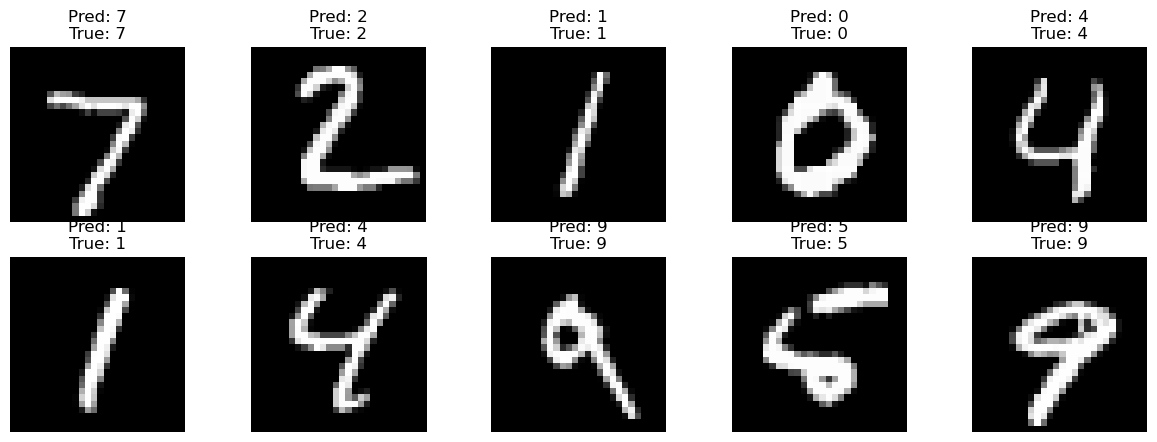

In [16]:
# Afficher les images avec leurs prédictions
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {pred_labels[i]}\nTrue: {true_labels[i]}')
    plt.axis('off')
plt.show()